In [2]:
# Import Liberies

# hide warnings
import warnings
warnings.filterwarnings('ignore')
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries for data manipulation
import numpy as np
import pandas as pd
# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
# Importing RFE - LinearRegression - Split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import os


In [3]:
# reading the dataset
house = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#Function to Check Nan in % 
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)  # percentage of values that are null
    types = df.dtypes
    missing_data = pd.concat([total, percent, types], axis=1, keys=['Total', 'Percent', 'Types'])  # putting the above two together
    return missing_data # return the dataframe


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">DataFrame Exploration</span>

In [5]:
# Head
house.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [6]:
# Tail
house.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1450         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1453         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1450      9   2009        WD         Normal     136000  
1451      5   2009       New        Partial     287090  
1452      5   2006        WD         Normal     145000  
1453      7   2006        WD        Abnorml      84500  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

Observations: 
 - **id**: variable has not a predictive power, we can drop it



In [7]:
#Drop ['Id'] variable
house = house.drop(['Id'], axis=1)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
house.shape

(1460, 80)

In [9]:
#Check the columns
columns = house.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
house.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [11]:
house.value_counts() 

Series([], dtype: int64)

In [12]:
#Verify the Nan Values in the columns
house.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [13]:
# Fill with NA or No xxxxx  or 0 Colums with Nulls
house['Alley'].fillna('No Alley', inplace=True)
house['MasVnrType'].fillna('None', inplace=True)
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['PoolQC'].fillna('No Pool', inplace=True) 
house['Fence'].fillna('No Fence', inplace=True) 
house['MasVnrArea'].fillna(0, inplace=True) 
house['LotFrontage'].fillna(0, inplace=True) 
house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [14]:
house.head()


MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0          60       RL         65.0     8450   Pave  No Alley      Reg   
1          20       RL         80.0     9600   Pave  No Alley      Reg   
2          60       RL         68.0    11250   Pave  No Alley      IR1   
3          70       RL         60.0     9550   Pave  No Alley      IR1   
4          60       RL         84.0    14260   Pave  No Alley      IR1   

  LandContour Utilities LotConfig  ... PoolArea   PoolQC     Fence  \
0         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
1         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   
2         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
3         Lvl    AllPub    Corner  ...        0  No Pool  No Fence   
4         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal     208500  
1         NaN       0      5    2007        WD         Normal     181500  
2         NaN       0      9    2008        WD         Normal     223500  
3         NaN       0      2    2006        WD        Abnorml     140000  
4         NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [15]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [16]:
#Verify the Nan Values in the columns
#Verify the Nan Values in the columns
house.isnull().sum().sort_values(ascending=False)

GarageYrBlt     81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 79, dtype: int64

In [17]:
missing_check(house)

NumExpr defaulting to 8 threads.


Total   Percent    Types
GarageYrBlt      81  5.547945  float64
BsmtFinType2     38  2.602740   object
BsmtExposure     38  2.602740   object
BsmtQual         37  2.534247   object
BsmtFinType1     37  2.534247   object
...             ...       ...      ...
MasVnrType        0  0.000000   object
Exterior2nd       0  0.000000   object
Exterior1st       0  0.000000   object
RoofMatl          0  0.000000   object
SalePrice         0  0.000000    int64

[79 rows x 3 columns]

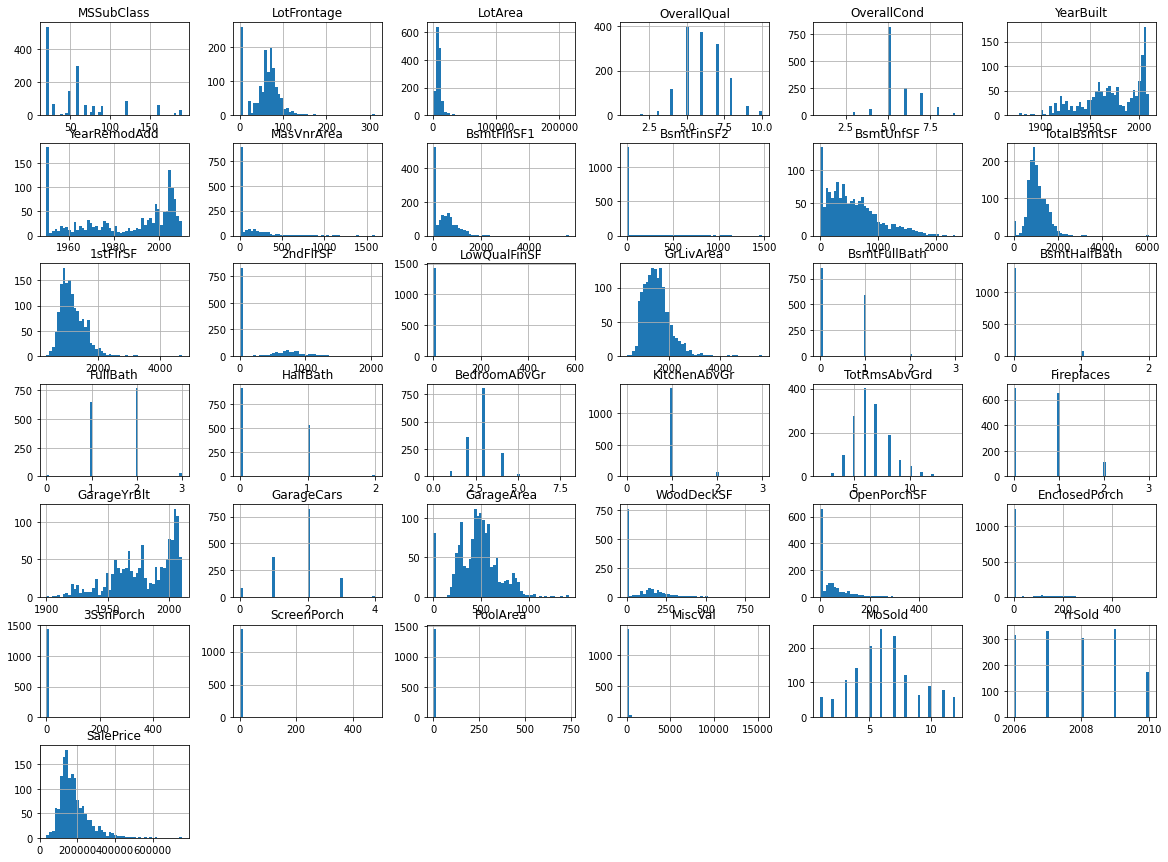

In [18]:
# Plot Data Frame and feel a categorical variables types.
house.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
#converting year to number of years
house['YearBuilt'] = 2023 - house['YearBuilt']
house['YearRemodAdd'] = 2023 - house['YearRemodAdd']
house['GarageYrBlt'] = 2023 - house['GarageYrBlt']
house['YrSold'] = 2023 - house['YrSold']

#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [20]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [21]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

MSSubClass MSZoning Street     Alley LotShape LandContour Utilities  \
0         60       RL   Pave  No Alley      Reg         Lvl    AllPub   
1         20       RL   Pave  No Alley      Reg         Lvl    AllPub   
2         60       RL   Pave  No Alley      IR1         Lvl    AllPub   
3         70       RL   Pave  No Alley      IR1         Lvl    AllPub   
4         60       RL   Pave  No Alley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... GarageType GarageFinish GarageCars  \
0    Inside       Gtl      CollgCr  ...     Attchd          RFn          2   
1       FR2       Gtl      Veenker  ...     Attchd          RFn          2   
2    Inside       Gtl      CollgCr  ...     Attchd          RFn          2   
3    Corner       Gtl      Crawfor  ...     Detchd          Unf          3   
4       FR2       Gtl      NoRidge  ...     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive   PoolQC     Fence SaleType SaleCondition  
0         TA         TA          Y  No Pool  No Fence       WD        Normal  
1         TA         TA          Y  No Pool  No Fence       WD        Normal  
2         TA         TA          Y  No Pool  No Fence       WD        Normal  
3         TA         TA          Y  No Pool  No Fence       WD       Abnorml  
4         TA         TA          Y  No Pool  No Fence       WD        Normal  

[5 rows x 54 columns]

In [22]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 283 columns]

In [23]:
# drop categorical variables 
final_house = house.drop(list(house_categorical.columns), axis=1)
columns_no_categorical = final_house.columns
columns_no_categorical

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
# concat dummy variables with house
final_house = pd.concat([final_house, house_dummies], axis=1)

In [25]:
final_house.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450         20            20       196.0         706   
1         80.0     9600         47            47         0.0         978   
2         68.0    11250         22            21       162.0         486   
3         60.0     9550        108            53         0.0         216   
4         84.0    14260         23            23       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 308 columns]

In [26]:
final_house.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     57.623288   10516.828082    51.732192     38.134247   103.117123   
std      34.664304    9981.264932    30.202904     20.645407   180.731373   
min       0.000000    1300.000000    13.000000     13.000000     0.000000   
25%      42.000000    7553.500000    23.000000     19.000000     0.000000   
50%      63.000000    9478.500000    50.000000     29.000000     0.000000   
75%      79.000000   11601.500000    69.000000     56.000000   164.250000   
max     313.000000  215245.000000   151.000000     73.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1460.000000     1460.000000   1460.000000   1460.000000   
mean         0.003425        0.003425      0.083562      0.002055   
std          0.058440        0.058440      0.276824      0.045299   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1460.000000            1460.000000           1460.000000   
mean      0.867808               0.002740              0.008219   
std       0.338815               0.052289              0.090317   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 308 columns]

In [27]:
missing_check(final_house)

Total   Percent    Types
GarageYrBlt               81  5.547945  float64
LotFrontage                0  0.000000  float64
Electrical_FuseP           0  0.000000    uint8
CentralAir_Y               0  0.000000    uint8
HeatingQC_TA               0  0.000000    uint8
...                      ...       ...      ...
HouseStyle_1.5Unf          0  0.000000    uint8
BldgType_TwnhsE            0  0.000000    uint8
BldgType_Twnhs             0  0.000000    uint8
BldgType_Duplex            0  0.000000    uint8
SaleCondition_Partial      0  0.000000    uint8

[308 rows x 3 columns]

In [28]:
final_house['GarageYrBlt']

0       20.0
1       47.0
2       22.0
3       25.0
4       23.0
        ... 
1455    24.0
1456    45.0
1457    82.0
1458    73.0
1459    58.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [29]:
mean_GarageYtBlt = final_house['GarageYrBlt'].mean()
mean_GarageYtBlt

44.493836113125454

In [30]:
final_house['GarageYrBlt'] = final_house['GarageYrBlt'].fillna(mean_GarageYtBlt)

In [31]:
missing_check(final_house)

Total  Percent    Types
LotFrontage                0      0.0  float64
Heating_Grav               0      0.0    uint8
CentralAir_Y               0      0.0    uint8
HeatingQC_TA               0      0.0    uint8
HeatingQC_Po               0      0.0    uint8
...                      ...      ...      ...
BldgType_TwnhsE            0      0.0    uint8
BldgType_Twnhs             0      0.0    uint8
BldgType_Duplex            0      0.0    uint8
BldgType_2fmCon            0      0.0    uint8
SaleCondition_Partial      0      0.0    uint8

[308 rows x 3 columns]

In [32]:
# Split DataFrame into Train and Test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final_house, train_size = 0.70, test_size = 0.30, random_state = 333)

In [33]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the numeric variables

df_train[columns_no_categorical] = scaler.fit_transform(df_train[columns_no_categorical])

In [34]:
df_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
174     -0.294506  0.209992  -0.497241     -0.058815    0.162471    2.263104   
1157    -0.682648 -0.593497  -1.183697     -1.119091    0.348298    1.114569   
921      0.302636 -0.184330   2.313959     -0.878119   -0.558973    1.533063   
184      1.049063 -0.329424   2.052452     -0.299787   -0.558973   -0.987203   
620     -0.354220 -0.241652   1.856322      1.676182   -0.558973   -0.891880   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
174     1.031079  -1.297378     1.344758  1.355320  ...               0   
1157   -0.297660  -0.378091     0.638731  0.425328  ...               0   
921    -0.297660  -0.875852     0.537179  0.309423  ...               0   
184    -0.297660  -0.167328    -1.319769 -0.617809  ...               0   
620    -0.297660   0.547922    -0.449325 -0.816502  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
174                0             0             0            1   
1157               0             0             0            1   
921                0             0             0            1   
184                0             0             0            1   
620                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
174                       0                     0                     0   
1157                      0                     0                     0   
921                       0                     0                     0   
184                       0                     0                     0   
620                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
174                      1                      0  
1157                     1                      0  
921                      1                      0  
184                      1                      0  
620                      1                      0  

[5 rows x 308 columns]

In [35]:
df_train.describe()

LotFrontage       LotArea     YearBuilt  YearRemodAdd    MasVnrArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   8.481625e-17  7.522006e-17  1.096087e-16 -1.285292e-16  8.851337e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.697790e+00 -9.945376e-01 -1.249074e+00 -1.215480e+00 -5.589734e-01   
25%   -4.736487e-01 -3.129531e-01 -9.875668e-01 -9.263134e-01 -5.589734e-01   
50%    9.363606e-02 -1.015427e-01 -3.960384e-02 -3.961755e-01 -5.589734e-01   
75%    6.310638e-01  1.291558e-01  5.814753e-01  8.568777e-01  3.155048e-01   
max    3.736202e+00  1.670715e+01  3.229234e+00  1.676182e+00  8.185809e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.018882e-16  3.262164e-19 -3.577506e-17 -1.162961e-16  2.661926e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -9.872034e-01 -2.976598e-01 -1.297378e+00 -2.538391e+00 -2.279101e+00   
25%   -9.872034e-01 -2.976598e-01 -7.928915e-01 -6.306672e-01 -7.502708e-01   
50%   -1.664892e-01 -2.976598e-01 -2.076867e-01 -1.349975e-01 -1.873082e-01   
75%    6.170255e-01 -2.976598e-01  5.322273e-01  6.024623e-01  6.405779e-01   
max    4.099830e+00  6.901804e+00  3.530000e+00  5.213400e+00  4.065267e+00   

       ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count  ...     1021.000000     1021.000000   1021.000000        1021.0   
mean   ...        0.002938        0.002938      0.084231           0.0   
std    ...        0.054153        0.054153      0.277870           0.0   
min    ...        0.000000        0.000000      0.000000           0.0   
25%    ...        0.000000        0.000000      0.000000           0.0   
50%    ...        0.000000        0.000000      0.000000           0.0   
75%    ...        0.000000        0.000000      0.000000           0.0   
max    ...        1.000000        1.000000      1.000000           0.0   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.871694               0.000979              0.007835   
std       0.334594               0.031296              0.088214   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.014691              0.822723               0.087169  
std                0.120374              0.382090               0.282221  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 308 columns]

In [36]:
# correlation matrix
columns_no_categorical
cor = df_train[columns_no_categorical].corr()
cor

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.001564  -0.042211     -0.090517    0.088997   
LotArea           0.001564  1.000000  -0.014872     -0.026961    0.113709   
YearBuilt        -0.042211 -0.014872   1.000000      0.584890   -0.318126   
YearRemodAdd     -0.090517 -0.026961   0.584890      1.000000   -0.199737   
MasVnrArea        0.088997  0.113709  -0.318126     -0.199737    1.000000   
BsmtFinSF1        0.029956  0.188862  -0.246428     -0.124209    0.234896   
BsmtFinSF2       -0.040119  0.029300   0.055768      0.053606   -0.074078   
BsmtUnfSF         0.164741  0.008813  -0.171143     -0.200421    0.128090   
TotalBsmtSF       0.193621  0.217005  -0.419727     -0.325013    0.354376   
1stFlrSF          0.187134  0.275421  -0.296109     -0.265374    0.338268   
2ndFlrSF          0.043655  0.062805  -0.011154     -0.147165    0.159638   
LowQualFinSF      0.053112  0.004962   0.215360      0.072288   -0.074694   
GrLivArea         0.176691  0.250910  -0.197422     -0.308051    0.370486   
GarageYrBlt      -0.051224  0.037521   0.763839      0.606489   -0.254186   
GarageArea        0.171876  0.181837  -0.495082     -0.398448    0.371046   
WoodDeckSF       -0.025723  0.218162  -0.223108     -0.216864    0.123263   
OpenPorchSF       0.044769  0.057754  -0.182495     -0.222061    0.104856   
EnclosedPorch     0.056080 -0.015006   0.397231      0.187757   -0.113085   
3SsnPorch         0.025370  0.026555  -0.017513     -0.041111    0.022157   
ScreenPorch       0.051315  0.047794   0.062293      0.047217    0.070186   
PoolArea          0.070399  0.051401   0.008204     -0.000830   -0.018421   
MiscVal          -0.048456  0.079131   0.041317      0.063678   -0.038236   
MoSold            0.000381  0.011826  -0.028137     -0.029230   -0.012026   
YrSold            0.031768  0.043378  -0.031668      0.018732    0.025506   
SalePrice         0.213782  0.273955  -0.523318     -0.514058    0.506896   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
LotFrontage      0.029956   -0.040119   0.164741     0.193621  0.187134  ...   
LotArea          0.188862    0.029300   0.008813     0.217005  0.275421  ...   
YearBuilt       -0.246428    0.055768  -0.171143    -0.419727 -0.296109  ...   
YearRemodAdd    -0.124209    0.053606  -0.200421    -0.325013 -0.265374  ...   
MasVnrArea       0.234896   -0.074078   0.128090     0.354376  0.338268  ...   
BsmtFinSF1       1.000000   -0.041480  -0.524993     0.458130  0.381046  ...   
BsmtFinSF2      -0.041480    1.000000  -0.217441     0.100874  0.087672  ...   
BsmtUnfSF       -0.524993   -0.217441   1.000000     0.450100  0.342053  ...   
TotalBsmtSF      0.458130    0.100874   0.450100     1.000000  0.798323  ...   
1stFlrSF         0.381046    0.087672   0.342053     0.798323  1.000000  ...   
2ndFlrSF        -0.145851   -0.116178  -0.000591    -0.196291 -0.220936  ...   
LowQualFinSF    -0.064402   -0.000750   0.021496    -0.044080 -0.019198  ...   
GrLivArea        0.139058   -0.037624   0.245599     0.395225  0.520430  ...   
GarageYrBlt     -0.152072    0.104656  -0.202657    -0.337079 -0.244001  ...   
GarageArea       0.270907   -0.027736   0.180979     0.466401  0.473170  ...   
WoodDeckSF       0.201418    0.056012  -0.017420     0.211884  0.230178  ...   
OpenPorchSF      0.075317    0.009091   0.109476     0.199825  0.162352  ...   
EnclosedPorch   -0.092210    0.002024  -0.018080    -0.114626 -0.091848  ...   
3SsnPorch        0.023163   -0.026326   0.032793     0.049487  0.083399  ...   
ScreenPorch      0.035842    0.091585   0.022831     0.096560  0.102646  ...   
PoolArea         0.069041    0.066162  -0.047032     0.046125  0.085100  ...   
MiscVal         -0.001146    0.023992  -0.035601    -0.030503 -0.023593  ...   
MoSold          -0.030185   -0.003109   0.036119     0.006382  0.021923  ...   
YrSold          -0.017969   -0.052241   0.051228     0.016782  0.021097  ...   
SalePrice   

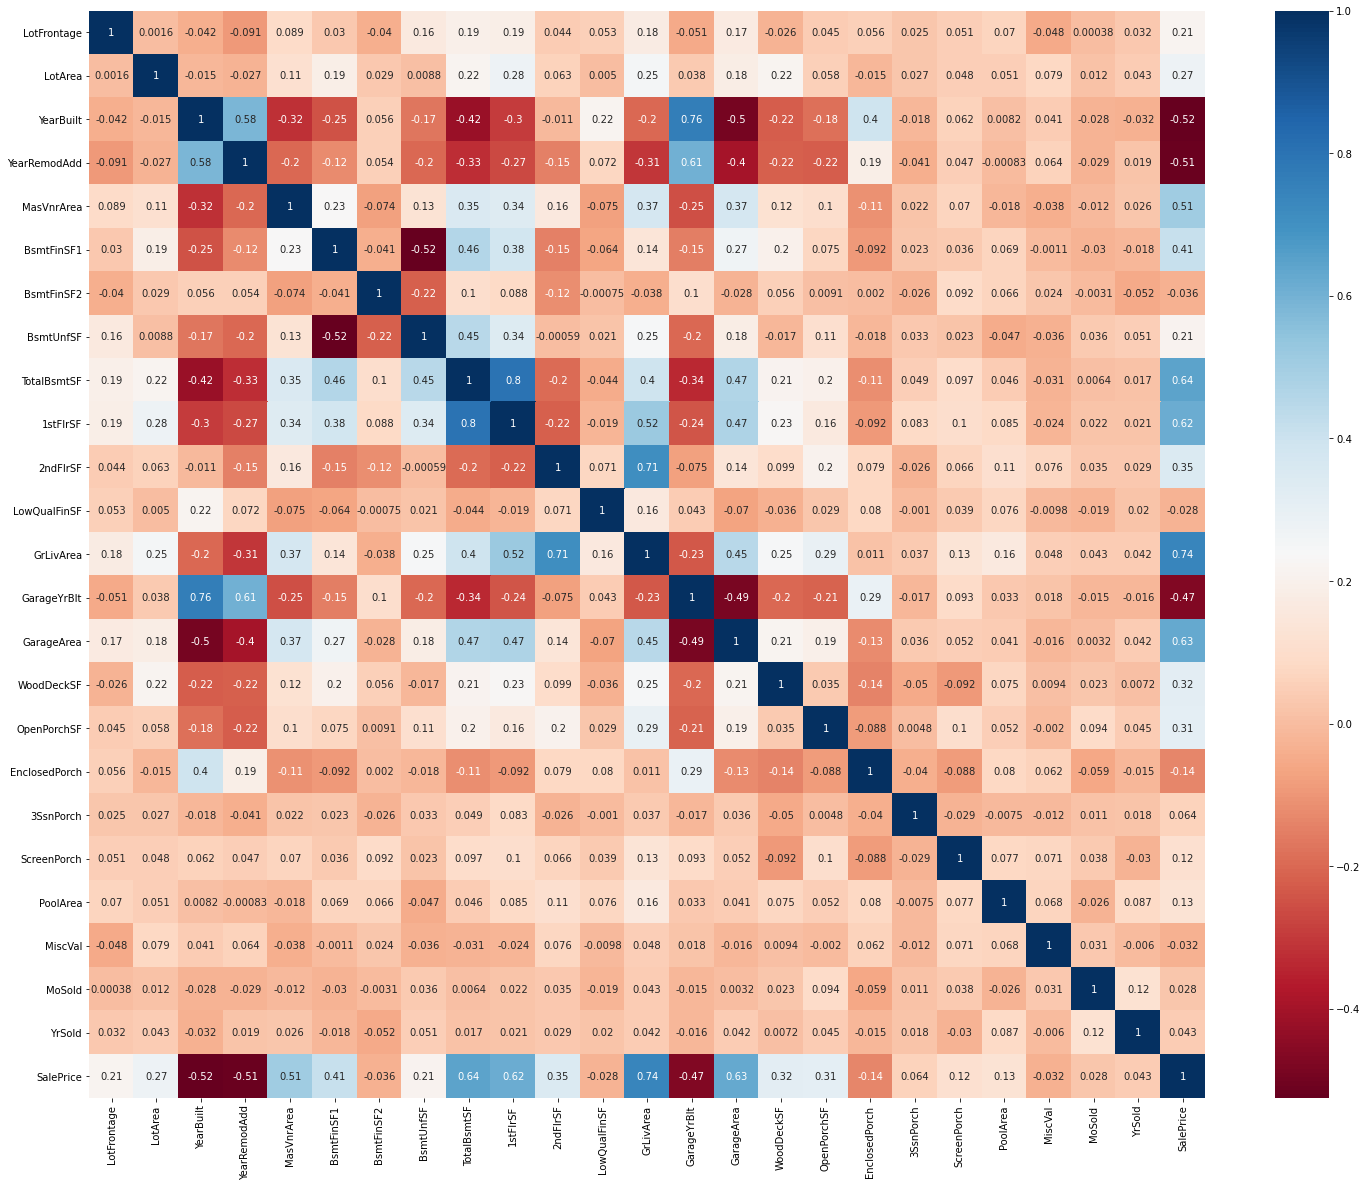

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis
plt.figure(figsize = (25,20))
sns.heatmap(df_train[columns_no_categorical].corr(), annot = True, cmap="RdBu")
plt.show()

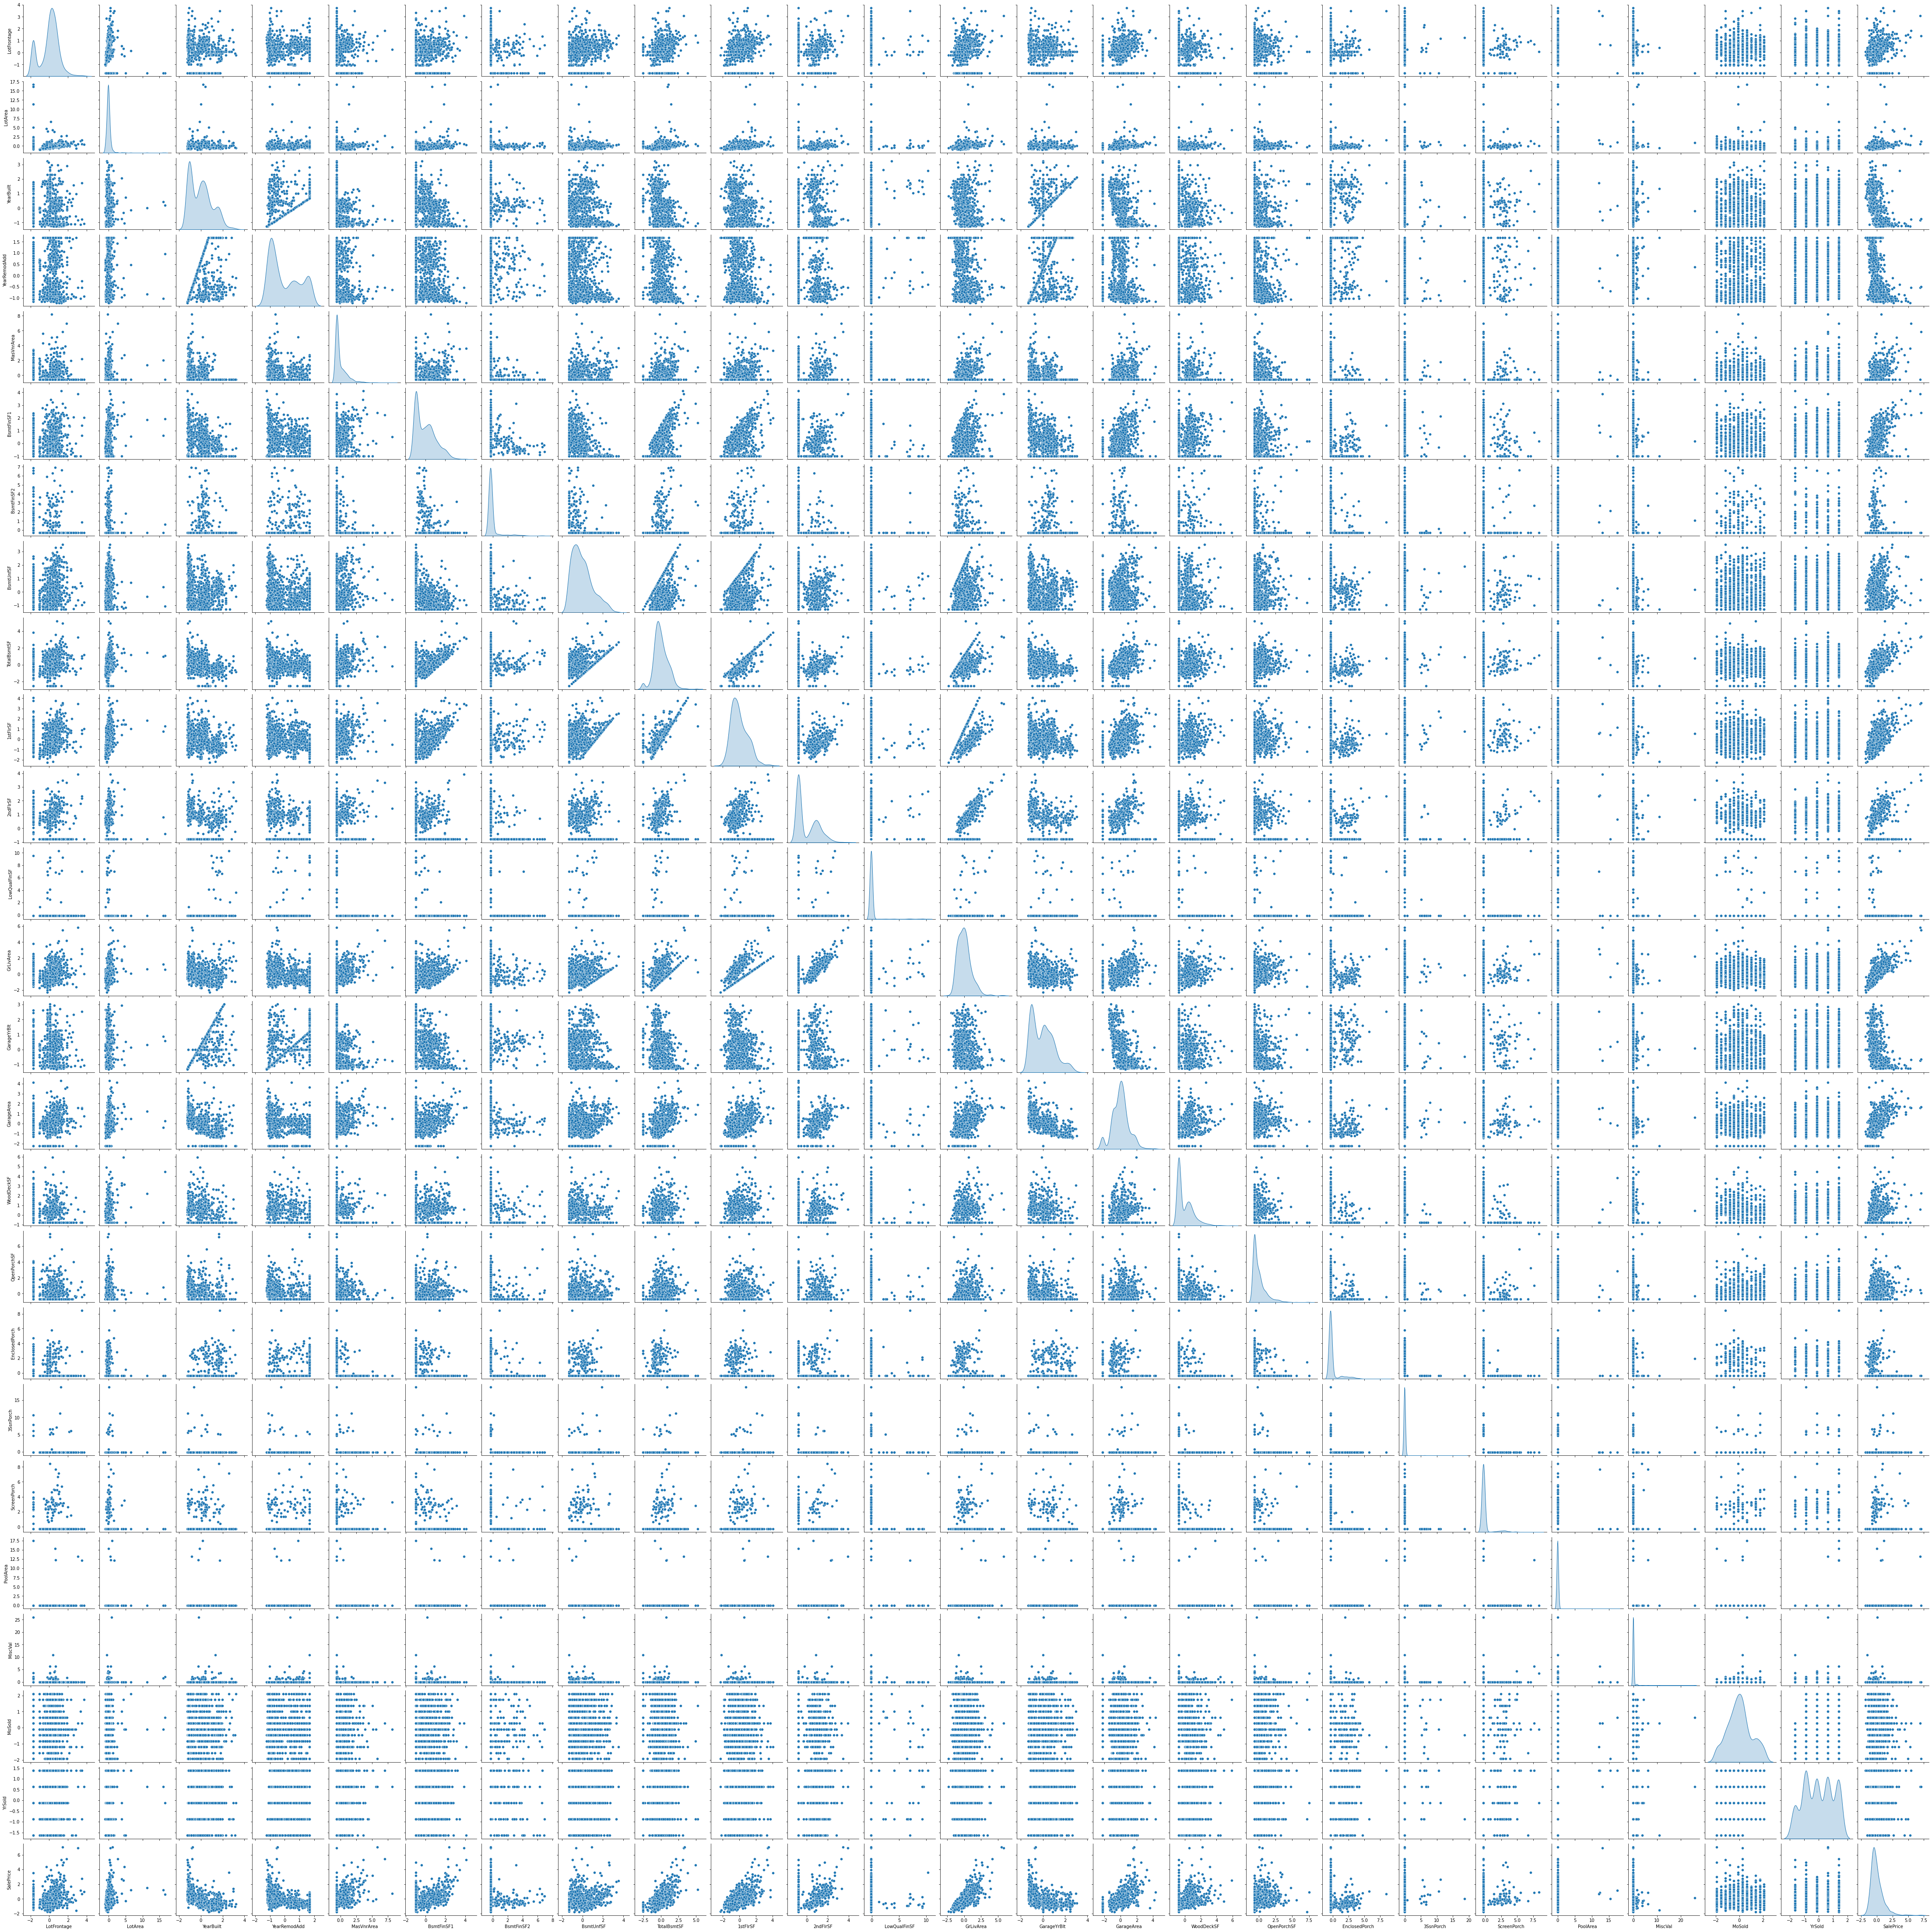

In [38]:
# Create a new dataframe of only numeric variables:
sns.pairplot(df_train[columns_no_categorical], diag_kind='kde')
plt.show()

## Model Building and Evaluation

In [39]:
# Create X and y Parameters
#Build a linear model with all variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [40]:
X_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
174     -0.294506  0.209992  -0.497241     -0.058815    0.162471    2.263104   
1157    -0.682648 -0.593497  -1.183697     -1.119091    0.348298    1.114569   
921      0.302636 -0.184330   2.313959     -0.878119   -0.558973    1.533063   
184      1.049063 -0.329424   2.052452     -0.299787   -0.558973   -0.987203   
620     -0.354220 -0.241652   1.856322      1.676182   -0.558973   -0.891880   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
174     1.031079  -1.297378     1.344758  1.355320  ...               0   
1157   -0.297660  -0.378091     0.638731  0.425328  ...               0   
921    -0.297660  -0.875852     0.537179  0.309423  ...               0   
184    -0.297660  -0.167328    -1.319769 -0.617809  ...               0   
620    -0.297660   0.547922    -0.449325 -0.816502  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
174                0             0             0            1   
1157               0             0             0            1   
921                0             0             0            1   
184                0             0             0            1   
620                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
174                       0                     0                     0   
1157                      0                     0                     0   
921                       0                     0                     0   
184                       0                     0                     0   
620                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
174                      1                      0  
1157                     1                      0  
921                      1                      0  
184                      1                      0  
620                      1                      0  

[5 rows x 307 columns]

In [41]:
y_train.head()

174     0.034336
1157    0.599679
921    -0.433916
184    -0.666198
620    -1.403603
Name: SalePrice, dtype: float64

In [42]:
Model= LinearRegression()
lm = Model.fit(X_train,y_train)

In [43]:
y_train_predict= Model.predict(X_train)

In [44]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict) 

0.9567744824588346

Text(0.5, 0, 'Errors')

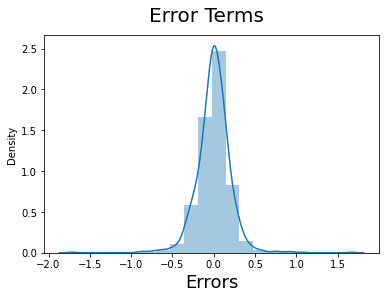

In [45]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

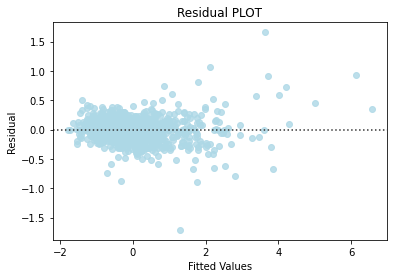

In [46]:
sns.residplot(x = y_train_predict, y = (y_train - y_train_predict), color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train_predict,X_train)
lzip(name, test)

[('F statistic', 1.009602764586901), ('p-value', 0.46990597165378606)]

As we can see from the above test the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means - residuals are homoscedastic.

Text(0.5, 1.0, 'MODEL Residuals Q-Q Plot')

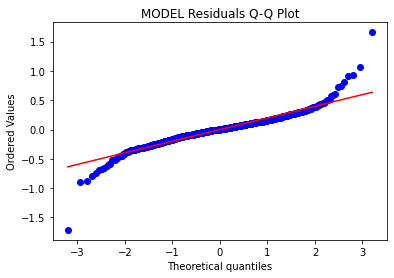

In [48]:
#Import library
from scipy import stats
stats.probplot((y_train - y_train_predict), dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")

In [49]:
# Polynomial Regression model 

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train) 
model = LinearRegression() 
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

1.0

Overfitting Polynomimal Grade 2

In [1]:
# Polynomial Regression model 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train) 
model = LinearRegression() 
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

NameError: name 'X_train' is not defined

In [ ]:
# Polynomial Regression model 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(X_train) 
model = LinearRegression() 
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

In [ ]:
# Polynomial Regression model 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(X_train) 
model = LinearRegression() 
model.fit(x_poly,y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

In [59]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.2)
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.7827230981577166

In [60]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.4)
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.5462111992576308

In [61]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.3)
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.6797742474677463

In [62]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.2)
model.fit(x_poly, y_train_predict)
r2_score(y_train, y_train_predict)

0.6797742474677463

In [63]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2)
model.fit(x_poly, y_train_predict)
r2_score(y_train, y_train_predict)

0.6797742474677463

In [64]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(x_poly, y_train_predict)
r2_score(y_train, y_train_predict)

0.6797742474677463

In [65]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(x_poly, y_train_predict)
r2_score(y_train, y_train_predict)

0.6797742474677463

In [68]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 80
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,300)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 3),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', False, 5),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', True, 1),
 ('YrSold', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', True, 1),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MS

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=300)

In [70]:
X_train.columns[~rfe.support_]

Index(['YearRemodAdd', 'GarageYrBlt', 'EnclosedPorch', 'Neighborhood_ClearCr',
       'Neighborhood_Veenker', 'Exterior2nd_MetalSd', 'SaleType_Oth'],
      dtype='object')

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [87]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [88]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     58.71
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:46:27   Log-Likelihood:                 154.30
No. Observations:                1021   AIC:                             251.4
Df Residuals:                     741   BIC:                             1631.
Df Model:                         279                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
226       KitchenAbvGr_1  inf
233       TotRmsAbvGrd_4  inf
94       BldgType_Duplex  inf
150   Exterior2nd_CBlock  inf
180          BsmtCond_Po  inf
..                   ...  ...
88       Condition2_PosA  NaN
127     RoofMatl_Membran  NaN
133  Exterior1st_AsphShn  NaN
147  Exterior2nd_AsphShn  NaN
202         HeatingQC_Po  NaN

[301 rows x 2 columns]

In [77]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["RoofStyle_Hip"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:41:32   Log-Likelihood:                 154.30
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["GarageCond_Fa"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:44:23   Log-Likelihood:                 154.29
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [80]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["Condition2_Feedr"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:45:24   Log-Likelihood:                 154.29
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [89]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["FullBath_2"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:57:51   Log-Likelihood:                 154.30
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [100]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["Neighborhood_NridgHt"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:06:12   Log-Likelihood:                 154.29
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [90]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["GarageCond_Fa"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:59:51   Log-Likelihood:                 154.29
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [101]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["GarageCond_Fa","TotRmsAbvGrd_9"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:07:49   Log-Likelihood:                 154.29
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [102]:
# without a variable 
import statsmodels.api as sm  
X_train_new = X_train_rfe.drop(["LowQualFinSF","BedroomAbvGr_6"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     59.00
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:09:37   Log-Likelihood:                 154.29
No. Observations:                1021   AIC:                             249.4
Df Residuals:                     742   BIC:                             1624.
Df Model:                         278                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
225       KitchenAbvGr_2  inf
230       TotRmsAbvGrd_3  inf
93       BldgType_Duplex  inf
135   Exterior1st_CBlock  inf
149   Exterior2nd_CBlock  inf
..                   ...  ...
87       Condition2_PosA  NaN
126     RoofMatl_Membran  NaN
132  Exterior1st_AsphShn  NaN
146  Exterior2nd_AsphShn  NaN
201         HeatingQC_Po  NaN

[299 rows x 2 columns]

In [109]:
# Polynomial Regression model with new X_train dataframe
from sklearn.preprocessing import PolynomialFeatures
poly_new = PolynomialFeatures(degree=3)
x_poly_new = poly.fit_transform(X_train_new) 
model = LinearRegression() 
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

1.0

In [110]:
# Polynomial Regression model with new X_train dataframe
from sklearn.preprocessing import PolynomialFeatures
poly_new = PolynomialFeatures(degree=4)
x_poly_new = poly.fit_transform(X_train_new) 
model = LinearRegression() 
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

1.0

In [122]:
# Polynomial Regression model 
from sklearn.preprocessing import PolynomialFeatures
poly_new = PolynomialFeatures(degree=1)
x_poly_new = poly.fit_transform(X) 
model = LinearRegression() 
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

1.0

In [111]:
# Polynomial Regression model with new X_train dataframe
from sklearn.preprocessing import PolynomialFeatures
poly_new = PolynomialFeatures(degree=4)
x_poly_new = poly.fit_transform(X_train_new) 
model = LinearRegression() 
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

1.0

In [116]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.5)
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

0.40575219443580024

In [118]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.3)
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

0.6796468626198174

In [119]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(x_poly_new, y_train)
y_train_predict= model.predict(x_poly_new)
r2_score(y_train, y_train_predict)

0.8410222630312627

In [126]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(x_poly_new, y_train_predict)
r2_score(y_train, y_train_predict)

1.0

#Conclusion
# Best model is a Lasso with a Lambda = 0.1 ,  using the last Data Frame
# Regression Linearl is the best solution, polynomial over n=2 is overfitting
# R2 = 0.84 for Lasso Regression
# R2 = 0.95 for original RL
# Ridge is not a good model is overfitting